In [1]:
from __future__ import print_function, division

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

## Defining the segments of the pipe

* Data > PCA > Data Features

* Data Features > Linear SVC > Classifications

Data > Pipeline > Classification

In [3]:
pipe = Pipeline([
    
    # Named step "reduce dim" ... uses code module PCA
    ("reduce_dim", PCA()), 
    
    # Named steps "classify" ... uses code module LinearSVC
    ("classify", LinearSVC())
])

## Hyperparametric tuning

The process of evaluating a collection of model hyperparameters when seeking optimal performance. 

In [4]:
# these are the possible number of features to reduce to
N_FEATURES_OPTIONS = [2, 4, 8]

# classify C parameter to explore
C_OPTIONS = [1, 10, 100, 1000]

param_grid = [
    {
        # options to instantiate the PCA model
        "reduce_dim": [PCA(iterated_power = 7), NMF()],
        
        ###############################
        # Parameters of the estimators in the 
        # pipeline can be accessed using the 
        # estimator parameter syntax
        # So: reduce = <estimator> and the PCA takes a parameter of n_components
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        # So: classify = <estimator> and the LinearSVC takes a parameter C
        "classify__C": C_OPTIONS
    }, 
    {
        # A second set of test cases for hyperparameters
        "reduce_dim": [SelectKBest(chi2)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS
    }    
]

reducer_labels = ["PCA", "NMF", "KBest(chi2)"]

## Define a search grid (collection of parameters)

In [5]:
grid = GridSearchCV(pipe, cv = 3, n_jobs = 1, param_grid = param_grid)

In [6]:
grid

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'reduce_dim': [PCA(copy=True, iterated_power=7, n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=None, random_state=None, shuffle=False, solver='cd',
  tol=0.000...ction chi2 at 0x0000019C57FE9B70>)], 'reduce_dim__k': [2, 4, 8], 'classify__C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=

### Load the data then fit the grid

This fitting does an exhaustive search across the hyperparamter space, each time re-using the pipeline for the movement from raw data to classification results. 

In [7]:
digits = load_digits()
grid.fit(digits.data, digits.target)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('classify', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'reduce_dim': [PCA(copy=True, iterated_power=7, n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=8, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, ver...ction chi2 at 0x0000019C57FE9B70>)], 'reduce_dim__k': [2, 4, 8], 'classify__C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=

## Evaluate

In [25]:
# the grid has cross-validation results stored in .cv_results_["mean_test_score"]
mean_scores = np.array(grid.cv_results_["mean_test_score"])

mean_scores

array([ 0.47356706,  0.72008904,  0.84474124,  0.32109071,  0.65831942,
        0.82025598,  0.39510295,  0.52754591,  0.79243183,  0.32609905,
        0.65831942,  0.82804674,  0.2687813 ,  0.51252087,  0.74902615,
        0.28380634,  0.63383417,  0.82025598,  0.29104062,  0.5837507 ,
        0.7801892 ,  0.27045075,  0.55648303,  0.77685031,  0.28380634,
        0.46299388,  0.68725654,  0.26933779,  0.3706177 ,  0.62548692,
        0.22815804,  0.27045075,  0.46076795,  0.12520868,  0.28102393,
        0.53478019])

In [26]:
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))

mean_scores

array([[[ 0.47356706,  0.72008904,  0.84474124],
        [ 0.32109071,  0.65831942,  0.82025598],
        [ 0.39510295,  0.52754591,  0.79243183]],

       [[ 0.32609905,  0.65831942,  0.82804674],
        [ 0.2687813 ,  0.51252087,  0.74902615],
        [ 0.28380634,  0.63383417,  0.82025598]],

       [[ 0.29104062,  0.5837507 ,  0.7801892 ],
        [ 0.27045075,  0.55648303,  0.77685031],
        [ 0.28380634,  0.46299388,  0.68725654]],

       [[ 0.26933779,  0.3706177 ,  0.62548692],
        [ 0.22815804,  0.27045075,  0.46076795],
        [ 0.12520868,  0.28102393,  0.53478019]]])

In [27]:
# select score for best C
mean_scores = mean_scores.max(axis = 0)

mean_scores

array([[ 0.47356706,  0.72008904,  0.84474124],
       [ 0.32109071,  0.65831942,  0.82025598],
       [ 0.39510295,  0.63383417,  0.82025598]])

In [28]:
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

bar_offsets

array([ 0.5,  4.5,  8.5])

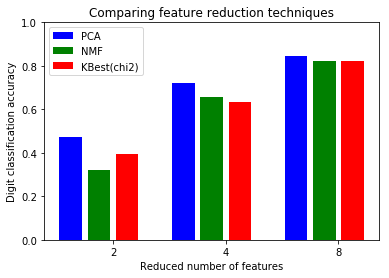

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label = label, color = COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

Reducing the digits data to 8 features through PCA gets us the best classification performance. We can now go back and build our model using this knowledge of the performance and hyperparameter relationship. 